In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [26]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

In [27]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

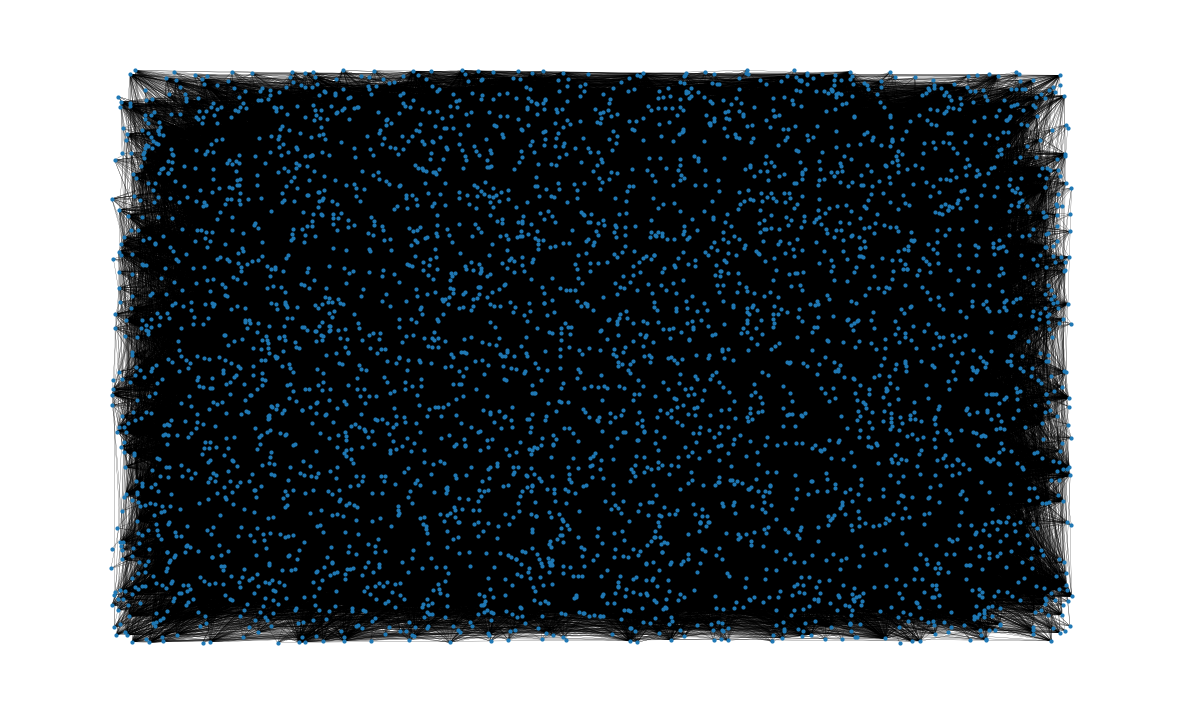

In [28]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 4, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

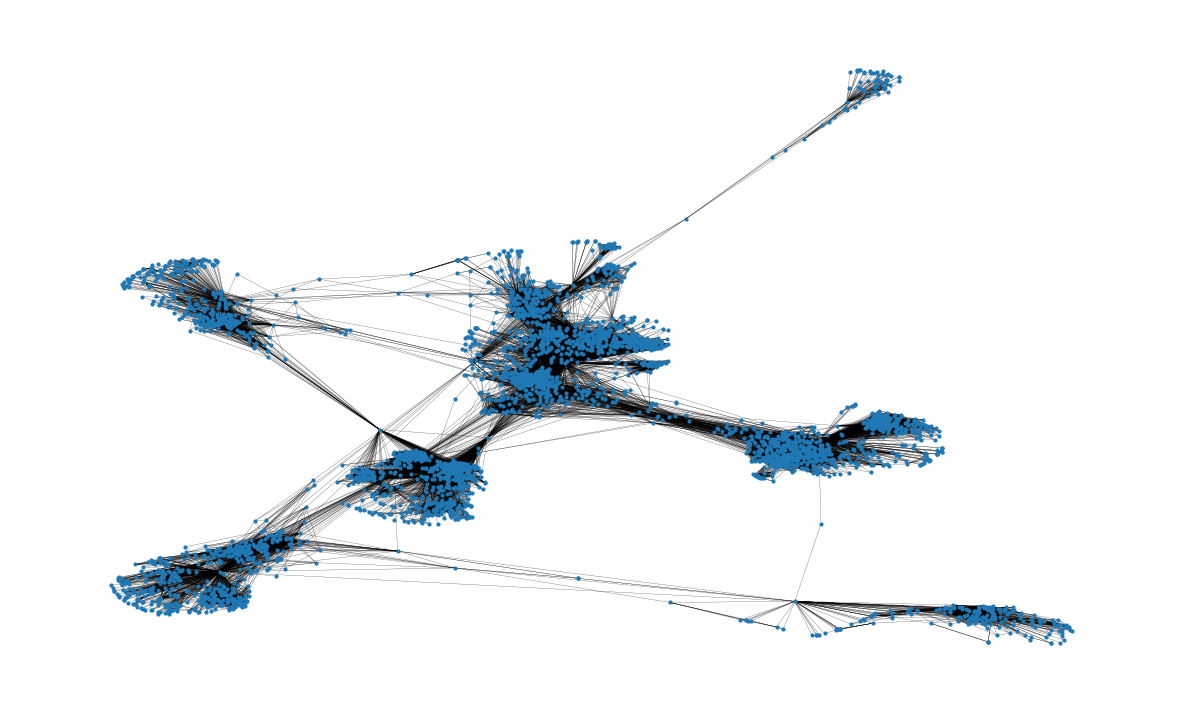

In [44]:
pos = nx.spring_layout(G, iterations=50) # тут покажем несколько графиков: 15, 30, 50, сделаем вывод
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

LPC (Label Propagation Communities) -- Алгоритм распространения меток

In [40]:
from random import randint

colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.asyn_lpa_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(com):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

72

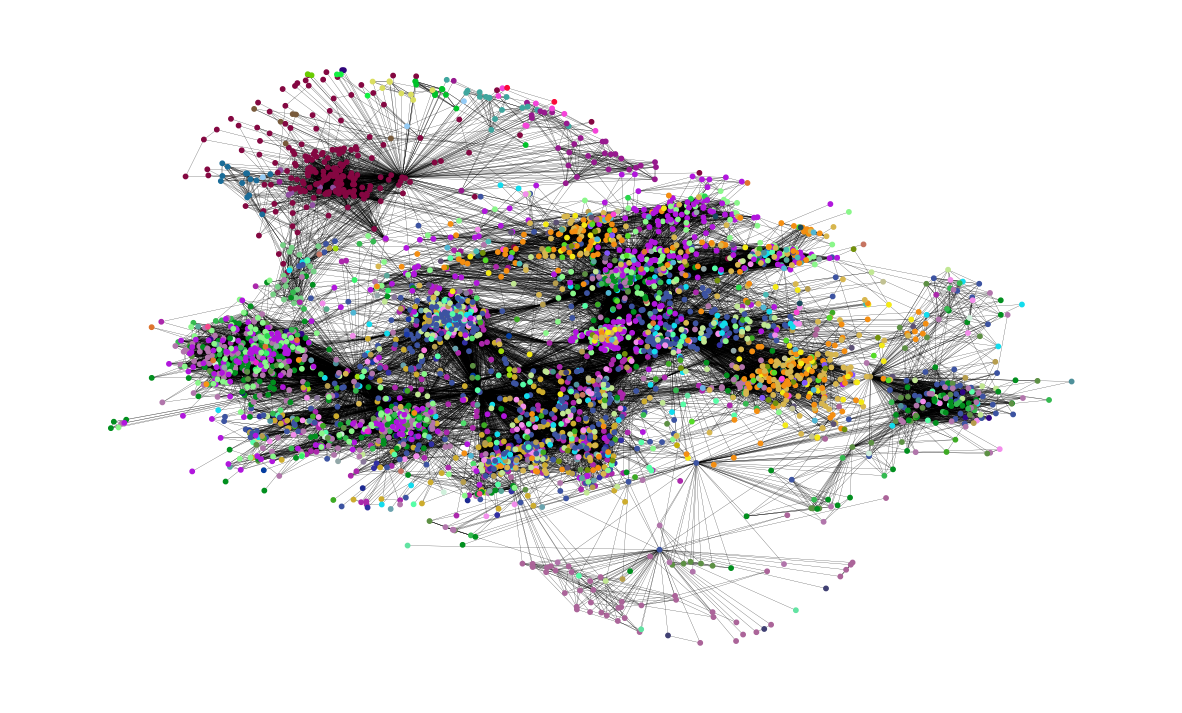

In [41]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

Louvain Community Detection -- Алгоритм Лувина

In [42]:
counter = 0
for com in nx.community.louvain_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

14

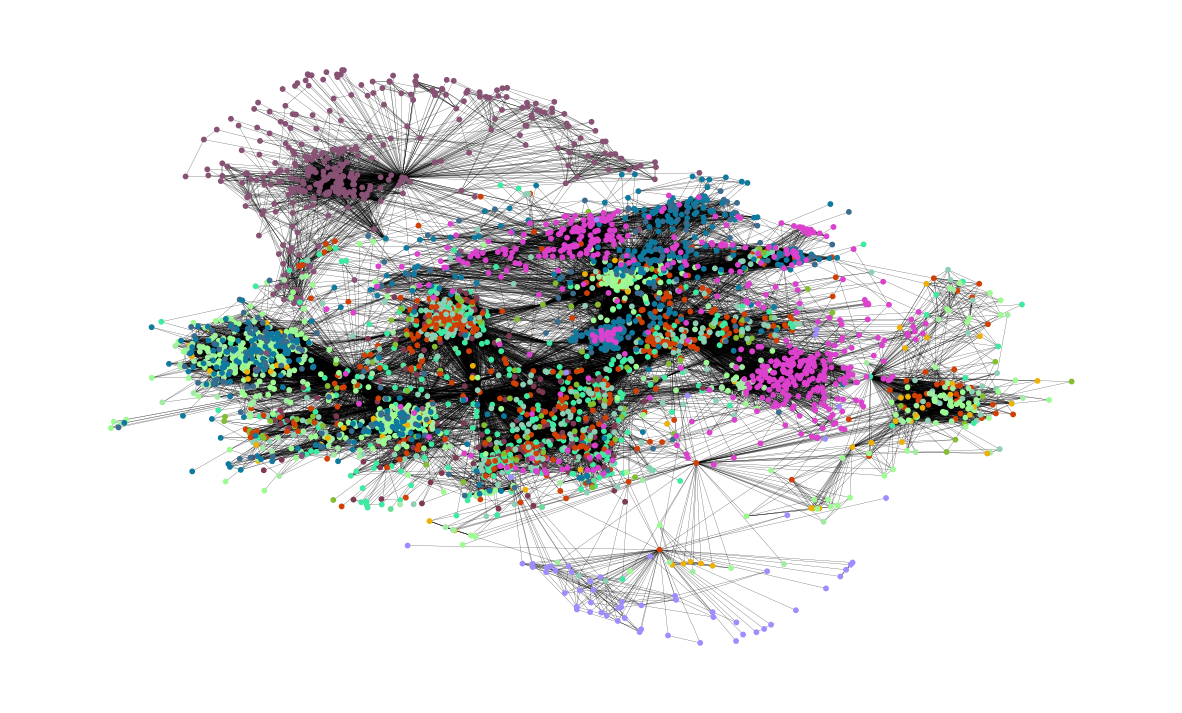

In [43]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

Fluid Communities -- алгоритм подвижных сообществ

In [36]:
counter = 0
for com in nx.community.asyn_fluidc(G, 6):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

6

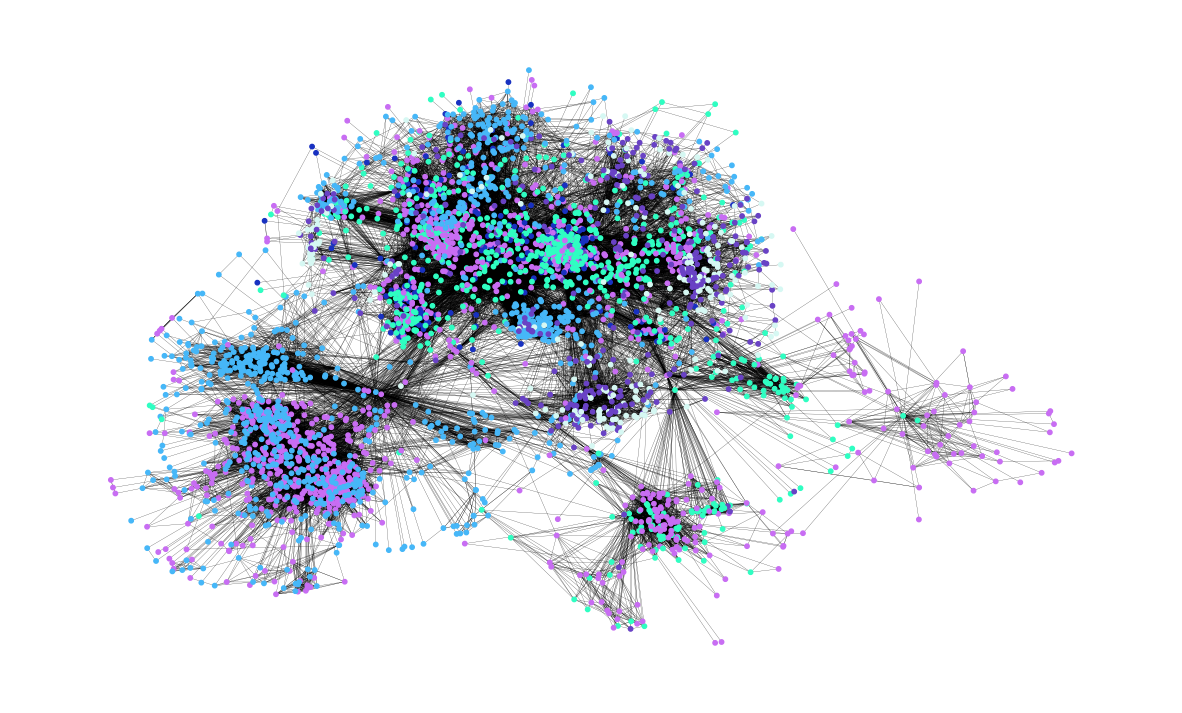

In [37]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)